In [2]:
import pickle
def rdPickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)
def mkPikle(filename, content):
    with open(filename, 'wb') as f:
        pickle.dump(content, f)
        f.close()

In [6]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [7]:
texts, _ = fetch_20newsgroups( subset='all', remove=('headers', 'footers', 'quotes'), return_X_y=True )

In [8]:
texts[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [9]:
tokenizer = lambda s: re.findall( '\w+', s.lower() )
texts = [ tokenizer(t) for t in  texts ]

In [10]:
topics = [ ['space', 'planet', 'mars', 'galaxy'],
           ['cold', 'medicine', 'doctor', 'health', 'water'],
           ['cats', 'health', 'keyboard', 'car', 'banana'],
           ['windows', 'mac', 'computer', 'operating', 'system']
          ]

# Creating a dictionary with the vocabulary
word2id = Dictionary( texts )

# Coherence model
cm = CoherenceModel(topics=topics, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()


Get the lda topic vectors

In [62]:
topic_words_lda = rdPickle('pickle/20News/topics_words.pkl')

In [63]:
topic_words_lda

[['game',
  'team',
  'year',
  'play',
  'season',
  'hockey',
  'new',
  'good',
  'league',
  'last',
  'first',
  'win',
  'period',
  'player',
  'power',
  'ground',
  'two',
  'back',
  'one',
  'second',
  'got',
  'best',
  'hit',
  'wire',
  'baseball',
  'blue',
  'division',
  'third',
  'goal',
  'great',
  'boston',
  'next',
  'home',
  'series',
  'red',
  'wiring',
  'left',
  'cup',
  'ice',
  'mike',
  'fan',
  'pick',
  'cal',
  'get',
  'neutral',
  'puck',
  'mon',
  'excellent',
  'scoring',
  'cover'],
 ['space',
  'information',
  'university',
  'anonymous',
  'research',
  'privacy',
  'system',
  'launch',
  'earth',
  'data',
  'computer',
  'mail',
  'satellite',
  'science',
  'security',
  'news',
  'shuttle',
  'orbit',
  'may',
  'center',
  'service',
  'address',
  'anonymity',
  'program',
  'lunar',
  'moon',
  'general',
  'technical',
  'network',
  'pub',
  'mission',
  'electronic',
  'national',
  'public',
  'posting',
  'first',
  'new',
  '

In [69]:
import numpy as np
#topic_words_lda[5].remove('njxp')
#topic_words_lda[5].remove('vfq')
topic_words_lda[5].remove('klj')


In [70]:
# Coherence model
cm1 = CoherenceModel(topics=topic_words_lda, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic1 = cm1.get_coherence_per_topic()

In [37]:
word2id

In [71]:
coherence_per_topic1

[0.5604290394706213,
 0.5367515248185573,
 0.6382346027720975,
 0.5057618293803648,
 0.609609601283865,
 0.48039759943719484,
 0.46513372282004584]

In [72]:
from statistics import mean
mean(coherence_per_topic1)

0.5423311314261067

/tmp/ipykernel_18538/2937055552.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


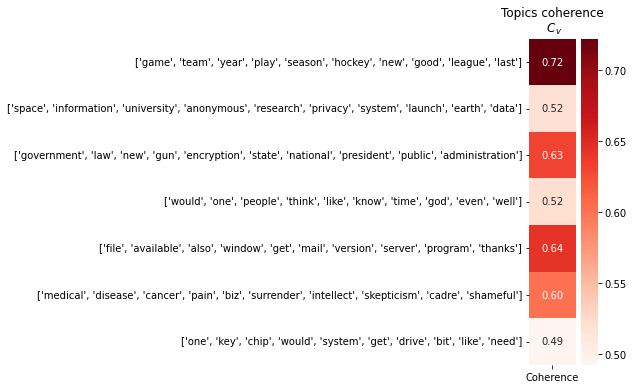

In [21]:
topics_str = [ '\n '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topic_words_lda, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(2,6) )
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

Coherence value for top2vec model

In [3]:
topic_words_t2v = rdPickle('pickle/20News/topic_words_t2v.pkl')

In [24]:
topic_words_t2v

[['bike',
  'ride',
  'car',
  'engine',
  'bikes',
  'cars',
  'riding',
  'tire',
  'tires',
  'mph',
  'suspension',
  'brakes',
  'low',
  'valve',
  'honda',
  'gear',
  'motorcycle',
  'brake',
  'miles',
  'throttle',
  'fuel',
  'weight',
  'metal',
  'motor',
  'rear',
  'expensive',
  'temperature',
  'vehicle',
  'passenger',
  'exhaust',
  'few',
  'cylinder',
  'wheel',
  'engines',
  'cheaper',
  'buy',
  'oil',
  'bmw',
  'seat',
  'garage',
  'much',
  'steering',
  'tank',
  'parking',
  'wheels',
  'vehicles',
  'small',
  'cycle',
  'damage',
  'driving'],
 ['user',
  'windows',
  'program',
  'application',
  'applications',
  'server',
  'files',
  'version',
  'software',
  'thanks',
  'resource',
  'motif',
  'programs',
  'available',
  'unix',
  'clients',
  'using',
  'mail',
  'users',
  'ftp',
  'manager',
  'client',
  'file',
  'window',
  'widget',
  'directory',
  'please',
  'display',
  'image',
  'xlib',
  'format',
  'environment',
  'running',
  'fu

In [11]:
# Coherence model
cm = CoherenceModel(topics=topic_words_t2v, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()

In [12]:
coherence_per_topic

[0.8165182803751959,
 0.7813457467480437,
 0.8394770854965291,
 0.7640522741401549,
 0.8216418476825593,
 0.8704153397087019,
 0.6055817011443108]

In [13]:
from statistics import mean
mean(coherence_per_topic)

0.785576039327928

Top2 vec wiht 118 topics

In [16]:
topic_words_t2v_full = rdPickle('pickle/20News/topic_words_t2v_full.pkl')

In [21]:
topic_mapping = rdPickle('pickle/20News/topic_mapping.pkl')

In [26]:
topic_words_t2v[0]

['bike',
 'ride',
 'car',
 'engine',
 'bikes',
 'cars',
 'riding',
 'tire',
 'tires',
 'mph',
 'suspension',
 'brakes',
 'low',
 'valve',
 'honda',
 'gear',
 'motorcycle',
 'brake',
 'miles',
 'throttle',
 'fuel',
 'weight',
 'metal',
 'motor',
 'rear',
 'expensive',
 'temperature',
 'vehicle',
 'passenger',
 'exhaust',
 'few',
 'cylinder',
 'wheel',
 'engines',
 'cheaper',
 'buy',
 'oil',
 'bmw',
 'seat',
 'garage',
 'much',
 'steering',
 'tank',
 'parking',
 'wheels',
 'vehicles',
 'small',
 'cycle',
 'damage',
 'driving']

sub topics of Topic reduction 0

In [34]:
model = rdPickle('pickle/20News/model_top2vec.pkl')

In [35]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes, topic_nums

(array([1390, 1059,  774,  659,  652,  562,  532,  496,  417,  336,  313,
         294,  289,  275,  269,  269,  245,  239,  238,  232,  225,  215,
         211,  206,  206,  200,  198,  197,  193,  192,  185,  180,  175,
         175,  174,  164,  132,  131,  128,  126,  123,  122,  122,  121,
         116,  112,  112,  111,  109,  108,  108,  107,  105,  102,  102,
         100,  100,   98,   97,   95,   93,   90,   90,   90,   88,   87,
          85,   81,   80,   78,   77,   77,   76,   76,   75,   75,   72,
          70,   69,   68,   65,   63,   63,   62,   62,   61,   61,   59,
          58,   58,   58,   58,   57,   57,   57,   56,   55,   54,   53,
          52,   51,   49,   48,   48,   44,   44,   43,   43,   42,   42,
          42,   41,   39,   38,   38,   35,   35,   35]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35

In [48]:
# Create a funcion to show reduced topic by index and the sub topics
def dispTopReduced(ind):
    print("Overall topic reduced words : ", topic_words_t2v[ind])

    for tp in topic_mapping[ind]:
        print()
        print("topic number : ", tp, " and Size : ", topic_sizes[tp])
        print()
        print(topic_words_t2v_full[tp])
        print()
        print("Sample document from this topic")
        print(model.search_documents_by_topic(tp, num_docs=1))

In [49]:
dispTopReduced(0)

Overall topic reduced words :  ['bike', 'ride', 'car', 'engine', 'bikes', 'cars', 'riding', 'tire', 'tires', 'mph', 'suspension', 'brakes', 'low', 'valve', 'honda', 'gear', 'motorcycle', 'brake', 'miles', 'throttle', 'fuel', 'weight', 'metal', 'motor', 'rear', 'expensive', 'temperature', 'vehicle', 'passenger', 'exhaust', 'few', 'cylinder', 'wheel', 'engines', 'cheaper', 'buy', 'oil', 'bmw', 'seat', 'garage', 'much', 'steering', 'tank', 'parking', 'wheels', 'vehicles', 'small', 'cycle', 'damage', 'driving']

topic number :  45  and Size :  112

['shameful', 'chastity', 'dsl', 'geb', 'skepticism', 'intellect', 'cadre', 'surrender', 'pitt', 'gordon', 'banks', 'soon', 'too', 'lyme', 'therapy', 'disease', 'patients', 'medicine', 'bacteria', 'weight', 'blood', 'effective', 'meant', 'physician', 'physicians', 'hurt', 'treatments', 'patient', 'usually', 'doctor', 'pressure', 'emergency', 'toxic', 'treatment', 'wash', 'edu', 'breath', 'diseases', 'dose', 'is', 'fault', 'liver', 'critical', 'et

In [50]:
dispTopReduced(1)

Overall topic reduced words :  ['user', 'windows', 'program', 'application', 'applications', 'server', 'files', 'version', 'software', 'thanks', 'resource', 'motif', 'programs', 'available', 'unix', 'clients', 'using', 'mail', 'users', 'ftp', 'manager', 'client', 'file', 'window', 'widget', 'directory', 'please', 'display', 'image', 'xlib', 'format', 'environment', 'running', 'functionality', 'microsoft', 'machines', 'processing', 'pc', 'email', 'sparc', 'shareware', 'compile', 'libraries', 'sun', 'via', 'font', 'graphics', 'postscript', 'contrib', 'workstation']

topic number :  37  and Size :  131

['apps', 'windows', 'os', 'nt', 'microsoft', 'dos', 'unix', 'api', 'novell', 'run', 'gui', 'programmer', 'beta', 'running', 'applications', 'powerpc', 'operating', 'setup', 'networking', 'solaris', 'ibm', 'motif', 'toolkits', 'clients', 'pc', 'machine', 'version', 'environment', 'vendor', 'application', 'marketing', 'client', 'linux', 'programmers', 'tcp', 'comp', 'developers', 'hardware',

In [17]:
# Coherence model
cm2 = CoherenceModel(topics=topic_words_t2v_full, 
                    texts=texts,
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic2 = cm2.get_coherence_per_topic()

In [18]:
coherence_per_topic2

[0.850331421724458,
 0.8129544774578893,
 0.8730670852350905,
 0.9042568237526727,
 0.916538331538556,
 0.861133794720983,
 0.6330011092944249,
 0.7151148492754134,
 0.878879812568643,
 0.5955927503002325,
 0.7454651448514651,
 0.7709791636925606,
 0.839712033115503,
 0.8020574904754796,
 0.8717003699901058,
 0.7123395302639978,
 0.5926464357374205,
 0.7838991635952749,
 0.8684378990813691,
 0.7736231342753601,
 0.9070236734964288,
 0.7795462727366042,
 0.6063184640798671,
 0.8673441821314978,
 0.3932060245992345,
 0.6860168720746812,
 0.9553794339945929,
 0.8631353635585111,
 0.9098035558053297,
 0.8913043364388571,
 0.6620463145331996,
 0.6606237929857115,
 0.7898074491949296,
 0.8157032987305521,
 0.713115477005805,
 0.8060122762856989,
 0.840802616011908,
 0.6908006592969997,
 0.4623040775930395,
 0.8898265804347437,
 0.8738417514963018,
 0.8578290417816457,
 0.7272696851579439,
 0.6875271289444276,
 0.7941133609225817,
 0.7085890894916754,
 0.7841089244529739,
 0.7606817041100012,

In [20]:
from statistics import mean
mean(coherence_per_topic2)

0.6699939418267856

Finding the Sub topics 

/tmp/ipykernel_18538/2054869953.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


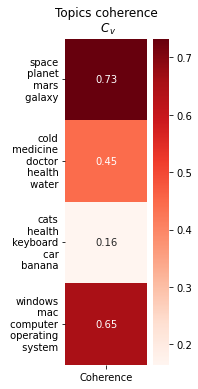

In [23]:
topics_str = [ '\n '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(2,6) )
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()